In [1]:
%load_ext autoreload
%autoreload 2

bike-packing True
49


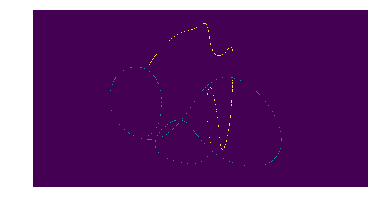

[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.0134819 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.       ]
0


In [9]:
from davisinteractive.client import DavisInteractiveSession
from davisinteractive.dataset import Davis
from davisinteractive.utils.scribbles import scribbles2mask

import matplotlib.pyplot as plt
%matplotlib inline

davis_root = '/Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/'
davis = Davis(davis_root)

def model(sequence, scribbles):
    seq_info = davis.dataset['sequences'][sequence]
    img_size = tuple(seq_info['image_size'][::-1])
    
    masks = scribbles2mask(scribbles, img_size, default_value=0, bezier_curve_sampling=True, bresenham_=True)
    return masks

with DavisInteractiveSession(host='localhost', davis_root=davis_root, 
                             subset='val', max_time=None, max_nb_interactions=3) as sess:
    while sess.is_running():
        sequence, scribbles, new_sequence = sess.get_scribbles(only_last=False)
        print(sequence, new_sequence)
        
        annotated_frame = scribbles['annotated_frame']
        print(annotated_frame)
        masks = model(sequence, scribbles)
        
#         plt.figure(dpi=600)
        plt.imshow(masks[annotated_frame])
        plt.axis('off')
        plt.show()
        
        sess.submit_masks(masks)
        break

In [ ]:
import numpy as np
from scipy.special import comb

points = np.asarray(scribbles['scribbles'][6][0]['path'], dtype=np.float)
points.shape

n_points = len(points)

t = np.linspace(0., 1., nb_points).reshape(1, -1)

# Compute the Bernstein polynomial of n, i as a function of t
i = np.arange(n_points).reshape(-1, 1)
n = n_points - 1
polynomial_array = comb(n, i) * (t**(n - i)) * (1 - t)**i


In [ ]:
comb(1000, 500)